In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gpt_4o_results = pd.read_csv("./results/results_chatgpt_gpt-4o-2024-05-13.csv")
gpt_4o_mini_results = pd.read_csv("./results/results_chatgpt_gpt-4o-mini-2024-07-18.csv")
gpt_4_turbo_results = pd.read_csv("./results/results_chatgpt_gpt-4-turbo-2024-04-09.csv")

claude_3_5_sonnet_results = pd.read_csv("./results/results_claude_claude-3-5-sonnet-20240620.csv")
claude_3_haiku_results = pd.read_csv("./results/results_claude_claude-3-haiku-20240307.csv")

gemini_1_5_pro_results = pd.read_csv("./results/results_google_gemini-1.5-flash-001.csv")

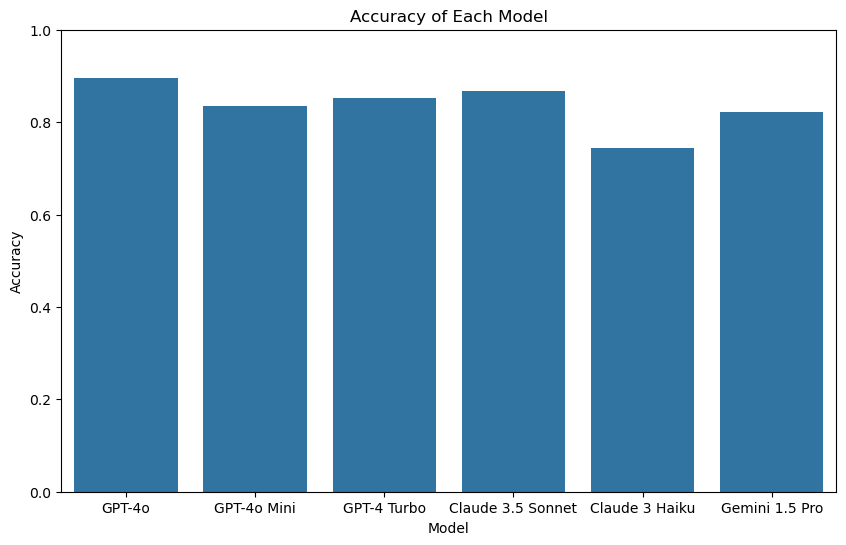

In [3]:
def plot_accuracy(df, model_name):
    accuracy = df['correct'].mean()
    return pd.DataFrame({'Model': [model_name], 'Accuracy': [accuracy]})


accuracy_gpt_4o = plot_accuracy(gpt_4o_results, 'GPT-4o')
accuracy_gpt_4o_mini = plot_accuracy(gpt_4o_mini_results, 'GPT-4o Mini')
accuracy_gpt_4_turbo = plot_accuracy(gpt_4_turbo_results, 'GPT-4 Turbo')
accuracy_claude_3_5_sonnet = plot_accuracy(claude_3_5_sonnet_results, 'Claude 3.5 Sonnet')
accuracy_claude_3_haiku = plot_accuracy(claude_3_haiku_results, 'Claude 3 Haiku')
accuracy_gemini_1_5_pro = plot_accuracy(gemini_1_5_pro_results, 'Gemini 1.5 Pro')

accuracy_df = pd.concat([accuracy_gpt_4o, accuracy_gpt_4o_mini, accuracy_gpt_4_turbo,
                         accuracy_claude_3_5_sonnet, accuracy_claude_3_haiku, accuracy_gemini_1_5_pro])

plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df, x='Model', y='Accuracy')
plt.title('Accuracy of Each Model')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Model')

plt.show()


,Subject,correct,Model
0,biology,0.800000,GPT-4o
1,chemistry,1.000000,GPT-4o
2,hard_geometry,0.700000,GPT-4o
3,hard_mathematics,0.800000,GPT-4o
4,mathematics,0.800000,GPT-4o
...,...,...,...
12,turkish_history,0.888889,Gemini 1.5 Pro
13,turkish_law,0.833333,Gemini 1.5 Pro
14,turkish_literature,0.578947,Gemini 1.5 Pro
15,turkish_politics,0.950000,Gemini 1.5 Pro


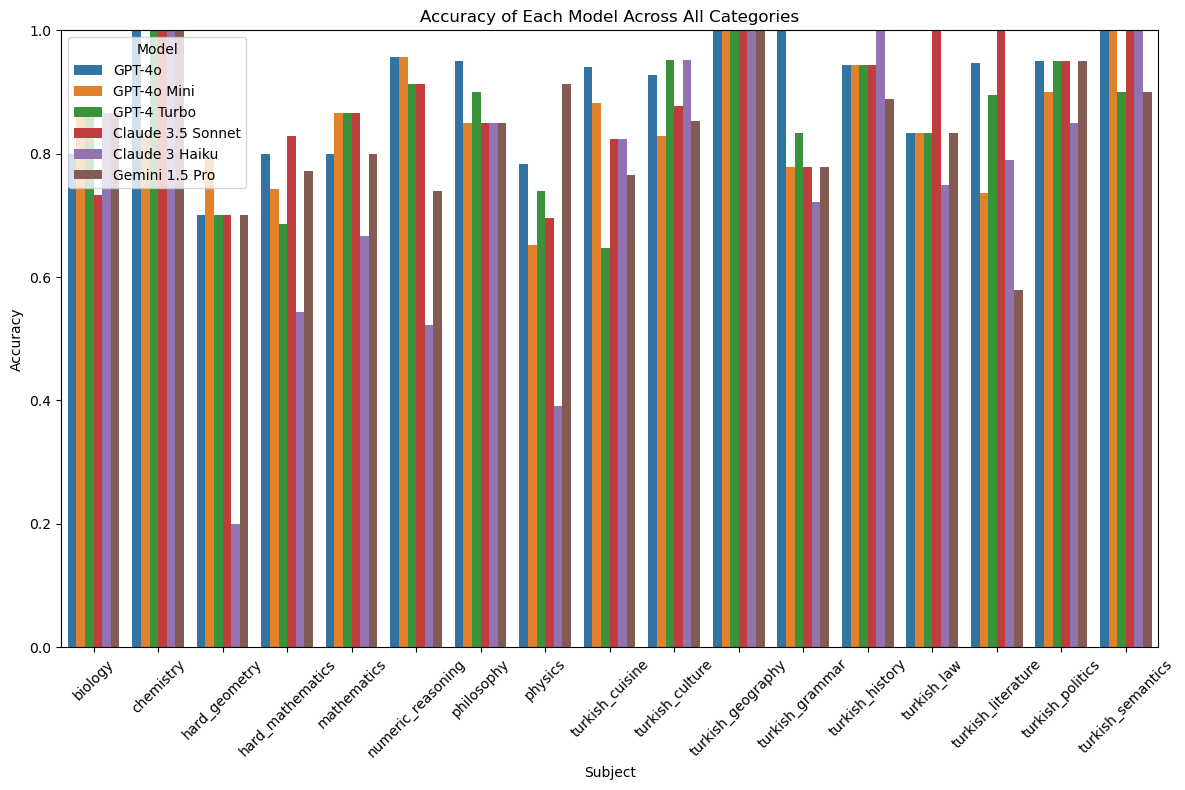

In [4]:
def calculate_accuracy_per_subject(df, model_name):
    subject_accuracy = df.groupby('Subject')['correct'].mean().reset_index()
    subject_accuracy['Model'] = model_name
    return subject_accuracy

accuracy_subject_chatgpt_gpt_4o = calculate_accuracy_per_subject(gpt_4o_results, 'GPT-4o')
accuracy_subject_chatgpt_gpt_4o_mini = calculate_accuracy_per_subject(gpt_4o_mini_results, 'GPT-4o Mini')
accuracy_subject_chatgpt_gpt_4_turbo = calculate_accuracy_per_subject(gpt_4_turbo_results, 'GPT-4 Turbo')
accuracy_subject_claude_3_5_sonnet = calculate_accuracy_per_subject(claude_3_5_sonnet_results, 'Claude 3.5 Sonnet')
accuracy_subject_claude_3_haiku = calculate_accuracy_per_subject(claude_3_haiku_results, 'Claude 3 Haiku')
accuracy_subject_gemini_1_5 = calculate_accuracy_per_subject(gemini_1_5_pro_results, 'Gemini 1.5 Pro')

accuracy_subject_df = pd.concat([accuracy_subject_chatgpt_gpt_4o, accuracy_subject_chatgpt_gpt_4o_mini, 
                                 accuracy_subject_chatgpt_gpt_4_turbo, accuracy_subject_claude_3_5_sonnet, 
                                 accuracy_subject_claude_3_haiku, accuracy_subject_gemini_1_5])

display(accuracy_subject_df)

# Plot the accuracy of each model across all categories
plt.figure(figsize=(12, 8))
sns.barplot(data=accuracy_subject_df, x='Subject', y='correct', hue='Model')
plt.title('Accuracy of Each Model Across All Categories')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Subject')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


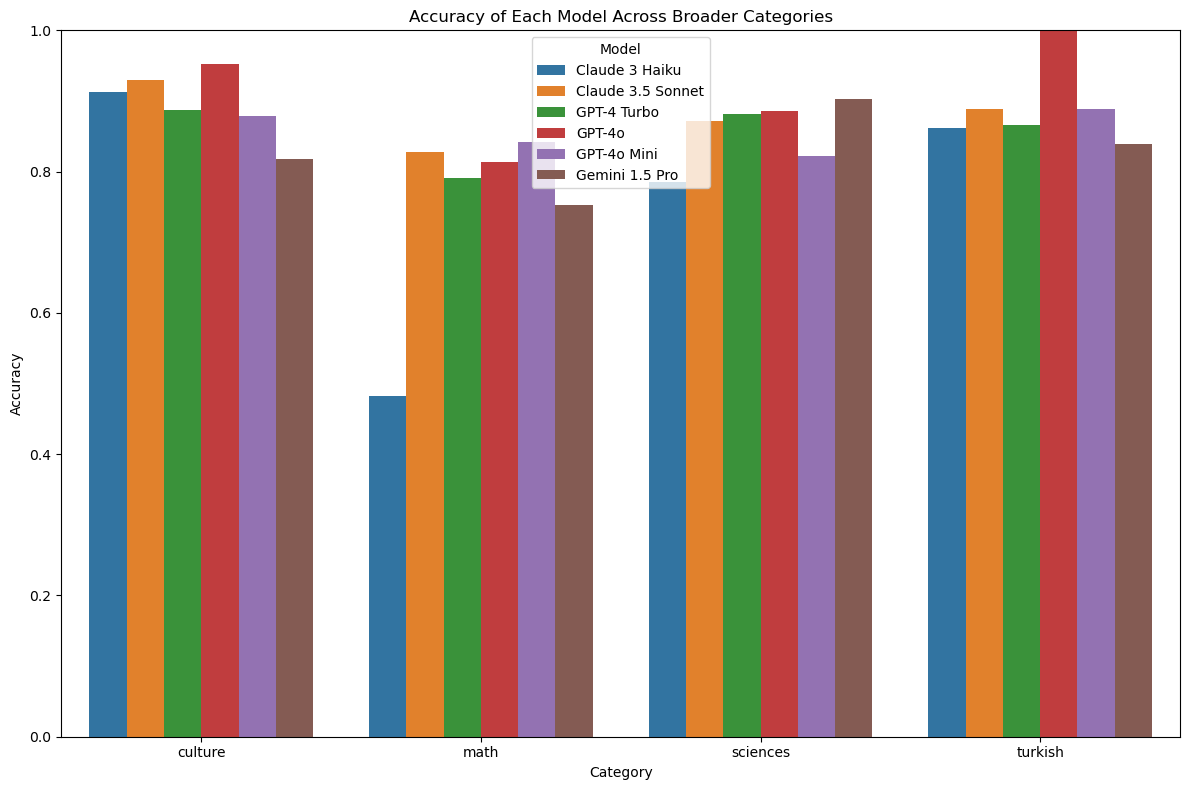

In [6]:
# Define the mapping of subjects to categories
general_categories = {
    "turkish_grammar": "turkish",
    "turkish_semantics": "turkish",
    "turkish_geography": "culture",
    "turkish_literature": "culture",
    "turkish_culture": "culture",
    "turkish_history": "culture",
    "turkish_cuisine": "culture",
    "numeric_reasoning": "math",
    "mathematics": "math",
    "hard_geometry": "math",
    "hard_mathematics": "math",
    "physics": "sciences",
    "biology": "sciences",
    "chemistry": "sciences",
    "turkish_law": "sciences",
    "philosophy": "sciences",
    "turkish_politics": "sciences",
}


accuracy_subject_df['Category'] = accuracy_subject_df['Subject'].map(general_categories)
accuracy_category_df = accuracy_subject_df.groupby(['Model', 'Category'])['correct'].mean().reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(data=accuracy_category_df, x="Category", y="correct", hue="Model")
plt.title("Accuracy of Each Model Across Broader Categories")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xlabel("Category")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


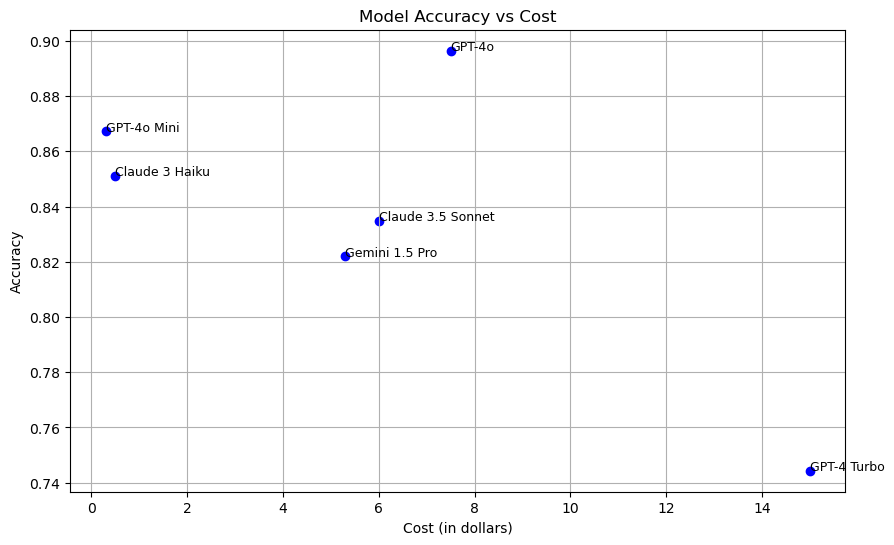

In [7]:
model_costs = {
    "GPT-4o": 7.5,
    "Claude 3.5 Sonnet": 6,
    "Claude 3 Haiku": 0.5,
    "GPT-4o Mini": 0.3,
    "GPT-4 Turbo": 15,
    "Gemini 1.5 Pro": 5.3,
}

accuracy_category_df['Cost'] = accuracy_category_df['Model'].map(model_costs)

def calculate_accuracy(df):
    accuracy = df['correct'].sum() / len(df)

    return accuracy

gpt_4o_accuracy = calculate_accuracy(gpt_4o_results)
gpt_4o_mini_accuracy = calculate_accuracy(gpt_4o_mini_results)
gpt_4_turbo_accuracy = calculate_accuracy(gpt_4_turbo_results)
claude_3_5_sonnet_accuracy = calculate_accuracy(claude_3_5_sonnet_results)
claude_3_haiku_accuracy = calculate_accuracy(claude_3_haiku_results)
gemini_1_5_pro_accuracy = calculate_accuracy(gemini_1_5_pro_results)


accuracy_cost_data = {
    "Model": ["GPT-4o", "Claude 3.5 Sonnet", "Claude 3 Haiku", "GPT-4o Mini", "GPT-4 Turbo", "Gemini 1.5 Pro"],
    "Accuracy": [
        gpt_4o_accuracy,
        gpt_4o_mini_accuracy,
        gpt_4_turbo_accuracy,
        claude_3_5_sonnet_accuracy,
        claude_3_haiku_accuracy,
        gemini_1_5_pro_accuracy
    ],
    "Cost": [model_costs[model] for model in ["GPT-4o", "Claude 3.5 Sonnet", "Claude 3 Haiku", "GPT-4o Mini", "GPT-4 Turbo", "Gemini 1.5 Pro"]]
}

accuracy_cost_df = pd.DataFrame(accuracy_cost_data)

# Plotting the accuracy-cost chart
plt.figure(figsize=(10, 6))
plt.scatter(accuracy_cost_df['Cost'], accuracy_cost_df['Accuracy'], color='blue')

for i, txt in enumerate(accuracy_cost_df['Model']):
    plt.annotate(txt, (accuracy_cost_df['Cost'][i], accuracy_cost_df['Accuracy'][i]), fontsize=9)

plt.title('Model Accuracy vs Cost')
plt.xlabel('Cost (in dollars)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

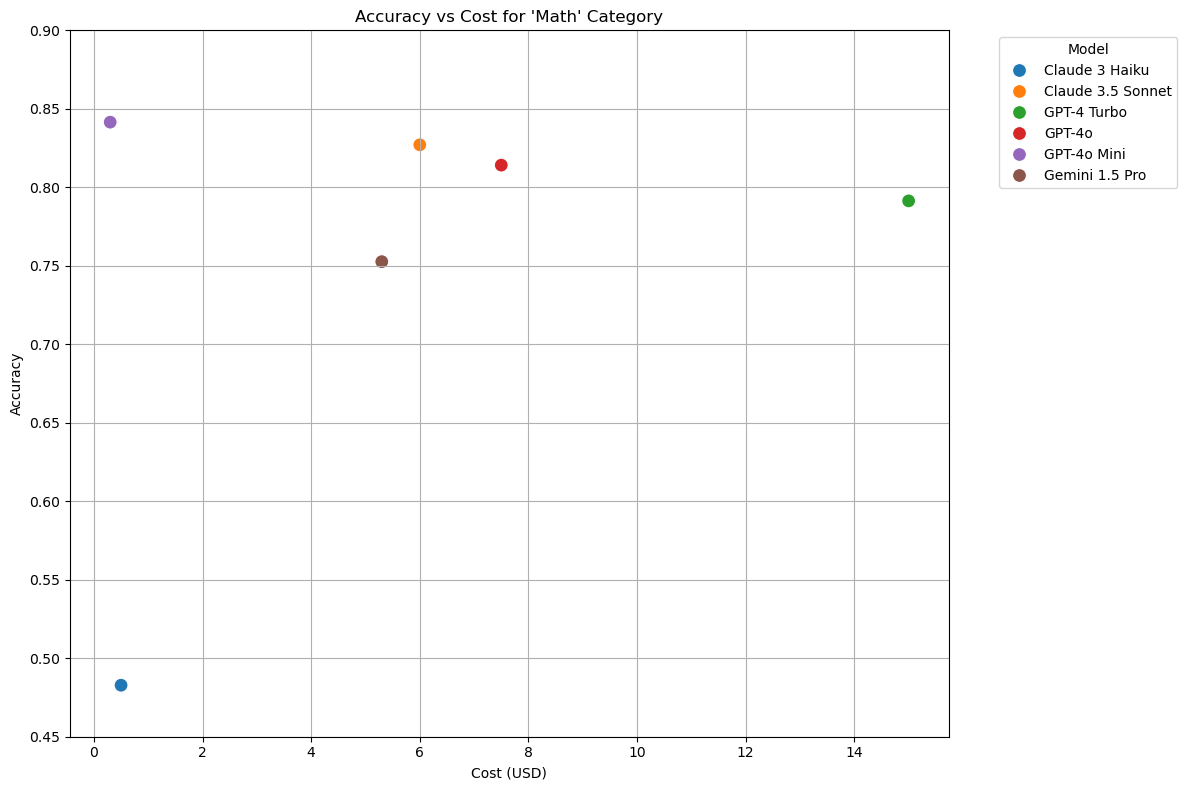

In [9]:
accuracy_category_df_math = accuracy_category_df[accuracy_category_df['Category'] == 'math']

plt.figure(figsize=(12, 8))
sns.scatterplot(data=accuracy_category_df_math, x="Cost", y="correct", hue="Model", s=100)
plt.title("Accuracy vs Cost for 'Math' Category")
plt.ylim(0.45, 0.9)
plt.ylabel("Accuracy")
plt.xlabel("Cost (USD)")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()
